In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

## Cobined Data

In [ ]:
# files = [
#     'level1_road_history_workday_utilization.csv',
#     'level1_road_history_holiday_utilization.csv',
#     'level2_road_history_workday_utilization.csv',
#     'level2_road_history_holiday_utilization.csv',
#     'level3_road_history_workday_utilization.csv',
#     'level3_road_history_holiday_utilization.csv'
# ]

In [11]:
# Define output directory and file list
output_dir = 'D:/Thesis/files_output_dir/output_utilization/'
files = [
    'level1_road_history_workday_utilization_emission.csv',
    'level1_road_history_holiday_utilization_emission.csv',
    'level2_road_history_workday_utilization_emission.csv',
    'level2_road_history_holiday_utilization_emission.csv',
    'level3_road_history_workday_utilization_emission.csv',
    'level3_road_history_holiday_utilization_emission.csv'
]

# Initialize an empty list to hold DataFrames
dataframes = []

# Iterate through the files and read each one
for file_name in files:
    file_path = os.path.join(output_dir, file_name)
    
    # Read the CSV file into a DataFrame
    df = pd.read_csv(file_path)
    
    # Append the DataFrame to the list
    dataframes.append(df)

# Concatenate all DataFrames into one
road_data = pd.concat(dataframes, ignore_index=True)

In [3]:
road_data.columns

Index(['road_id', 'length', 'lanes', 'max_speed', 'dir', 'level', 'tor',
       'n_connnections', 'school', 'ofc', 'bnk', 'mall', 'rest', 'gas_st',
       'spot', 'hotel', 'trans', 'living_ser', 'sum_poi', 'weighted_POI',
       'time', 'avg_speed', 'avg_speed std', 'no_taxi_car', 'volume_claas',
       'theta', 'volume', 'qc', 'vc', 'Uq', 'Uv', 'Uq_norm', 'Uv_norm',
       'theta_norm', 'utilization', 'inv_utilization', 'EF_fc',
       'fuel_consumption', 'co2', 'pm2.5'],
      dtype='object')

In [4]:
road_data.shape

(7105272, 40)

In [4]:
# output_dir = 'D:/Thesis/files_output_dir/output_utilization/'
# road_data = pd.read_csv(output_dir + 'level1_road_history_workday_utilization_emission.csv')

In [5]:
road_data[['avg_speed','volume', 'Uv', 'Uq', 'Uv_norm', 'Uq_norm',
       'theta_norm', 'utilization','fuel_consumption', 'co2', 'pm2.5']]

,avg_speed,volume,Uv,Uq,Uv_norm,Uq_norm,theta_norm,utilization,fuel_consumption,co2,pm2.5
0,9.392215,33.50,0.927845,1.000000,0.310658,0.288747,0.5,0.295326,1.822261e+06,5.794789e+06,54.667820
1,7.426522,13.60,0.733657,0.405970,0.245640,0.000000,0.5,0.197580,8.132819e+05,2.586236e+06,24.398457
2,7.714734,33.50,0.762129,1.000000,0.255173,0.288747,0.5,0.278178,1.974175e+06,6.277878e+06,59.225260
3,6.754791,13.60,0.667298,0.405970,0.223422,0.000000,0.5,0.190453,8.424632e+05,2.679033e+06,25.273895
4,5.377924,13.60,0.531279,0.405970,0.177881,0.000000,0.5,0.175374,9.104370e+05,2.895190e+06,27.313110
...,...,...,...,...,...,...,...,...,...,...,...
7105267,17.537195,13.95,1.234830,0.694030,0.371559,0.038006,0.5,0.239581,2.394425e+05,7.614271e+05,7.183275
7105268,14.470581,4.90,1.018903,0.243781,0.306587,0.011029,0.5,0.217089,9.263853e+04,2.945905e+05,2.779156
7105269,13.756063,13.95,0.968592,0.694030,0.291448,0.038006,0.5,0.215589,2.703532e+05,8.597233e+05,8.110597
7105270,14.069943,13.95,0.990693,0.694030,0.298099,0.038006,0.5,0.217627,2.673955e+05,8.503178e+05,8.021866


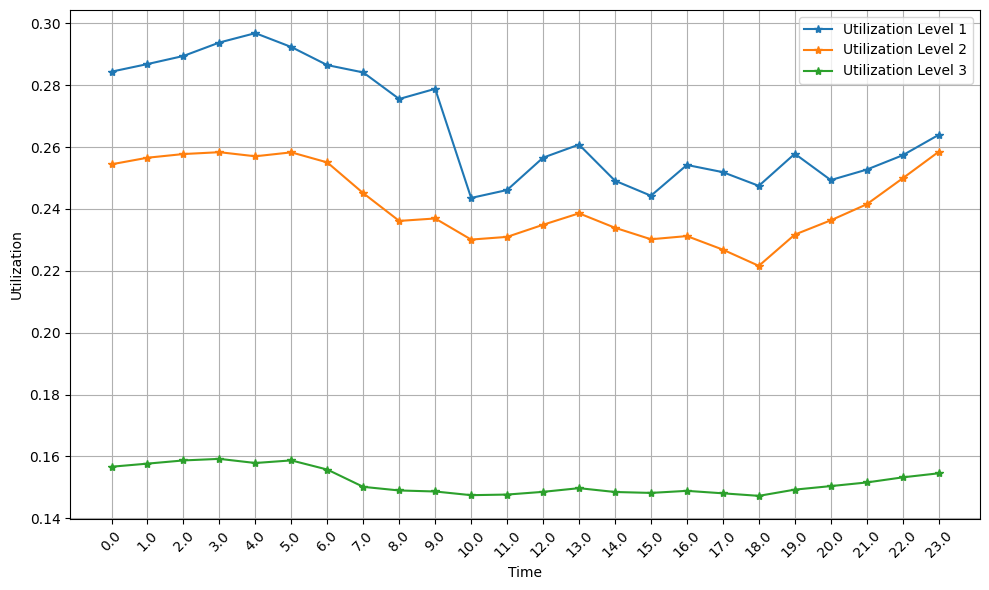

In [12]:
# Function to convert time slot (0-143) to HH format (only hours)
def time_slot_to_hhmm(slot):
    hours = slot // 6  # Each 10-minute slot corresponds to 1/6th of an hour
    return f'{hours:02}'

plt.figure(figsize=(10, 6))

# Loop through levels 1, 2, and 3 to plot each one separately
for level in [1, 2, 3]:
    # Filter data for the current level
    if level == 1:
        level_data = road_data[road_data['level'] <= level]
    elif level == 2:
        level_data = road_data[road_data['level'] == level]
    else:
        level_data = road_data[road_data['level'] >= level]
    
    # Group by 'time' and calculate the mean for numeric columns for this level
    numeric_columns = level_data.select_dtypes(include=[np.number]).columns
    aggregated_time_data = level_data.groupby('time')[numeric_columns].mean()
    
    # Reset index only if 'time' is not already in the columns
    if 'time' not in aggregated_time_data.columns:
        aggregated_time_data = aggregated_time_data.reset_index()  # This avoids the time conflict

    # Filter for only hourly data (slots: 0, 6, 12, ..., 138)
    hourly_slots = aggregated_time_data[aggregated_time_data['time'] % 6 == 0]
    
    # Convert time slots to 'HH:MM' format for x-axis labels
    hourly_time_labels = hourly_slots['time'].apply(time_slot_to_hhmm)
    
    # Plot utilization for the current level
    plt.plot(hourly_time_labels, hourly_slots['utilization'], 
             label=f'Utilization Level {level}', marker='*')

# Add labels and grid
plt.xlabel('Time')
plt.ylabel('Utilization')
plt.grid(True)

# Rotate x-axis labels for readability
plt.xticks(rotation=45)

# Add legend
plt.legend(loc='upper right')

# Save and show the plot
plt.tight_layout()
plt.show()


## Correlation

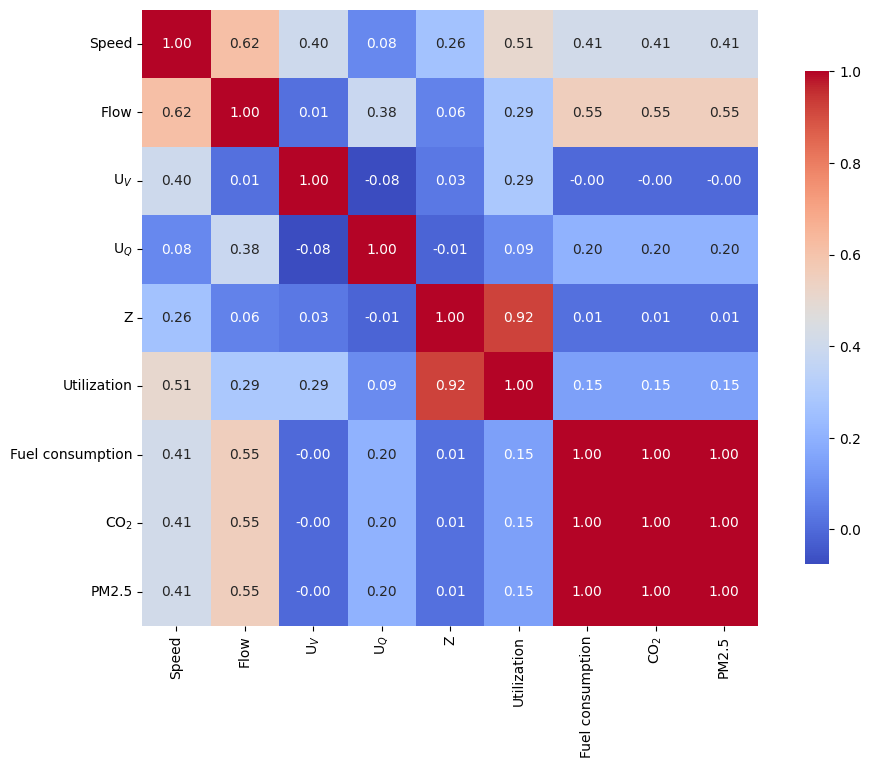

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming road_data is your DataFrame containing the specified columns
# Example: road_data = pd.read_csv('your_file.csv')

# Select the columns of interest
correlation_data = road_data[['avg_speed', 'volume', 'Uv', 'Uq',
                               'theta', 'utilization', 'fuel_consumption', 'co2', 'pm2.5']]

# # Rename the columns
# correlation_data.columns = ['Speed', 'Flow', 'Uv', 'Uq',
#                             'Z', 'Utilization', 'Fuel consumption', 'CO2', 'PM2.5']


# # Calculate the correlation matrix
# correlation_matrix = correlation_data.corr()

# # Set up the matplotlib figure
# plt.figure(figsize=(12, 8))

# # Create a heatmap with the correlation matrix
# sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})

# # Title for the heatmap
# # plt.title('Correlation Heatmap')

# # Show the plot
# plt.show()

# Rename the columns without LaTeX for internal use
correlation_data.columns = ['Speed', 'Flow', 'Uv', 'Uq', 'Z', 'Utilization', 'Fuel consumption', 'CO2', 'PM2.5']

# Calculate the correlation matrix
correlation_matrix = correlation_data.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Create a heatmap with the correlation matrix
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, 
            cbar_kws={"shrink": .8}, 
            xticklabels=['Speed', 'Flow', r'U$_V$', r'U$_Q$', 'Z', 'Utilization', 'Fuel consumption', r'CO$_2$', 'PM2.5'], 
            yticklabels=['Speed', 'Flow', r'U$_V$', r'U$_Q$', 'Z', 'Utilization', 'Fuel consumption', r'CO$_2$', 'PM2.5'])

# Show the plot
plt.show()

In [10]:
# Calculate the correlation matrix
correlation_matrix = correlation_data.corr()

# Display the correlation matrix
print("Correlation Matrix:")
correlation_matrix

Correlation Matrix:


,speed,volume,Uv,Uq,Uv_norm,Uq_norm,theta_norm,utilization,fuel_consumption,CO2,PM2.5
speed,1.000000,0.615258,0.401242,0.077620,0.665598,0.416212,0.264096,0.507776,0.414115,0.414115,0.414115
volume,0.615258,1.000000,0.014567,0.383584,0.282133,0.790903,0.062016,0.286269,0.551754,0.551754,0.551754
Uv,0.401242,0.014567,1.000000,-0.075854,0.883474,-0.014998,0.033780,0.288975,-0.003880,-0.003880,-0.003880
Uq,0.077620,0.383584,-0.075854,1.000000,-0.005053,0.614149,-0.014918,0.087743,0.204458,0.204458,0.204458
Uv_norm,0.665598,0.282133,0.883474,-0.005053,1.000000,0.161361,0.161624,0.467144,0.143403,0.143403,0.143403
Uq_norm,0.416212,0.790903,-0.014998,0.614149,0.161361,1.000000,-0.023502,0.233541,0.486235,0.486235,0.486235
theta_norm,0.264096,0.062016,0.033780,-0.014918,0.161624,-0.023502,1.000000,0.921302,0.013615,0.013615,0.013615
utilization,0.507776,0.286269,0.288975,0.087743,0.467144,0.233541,0.921302,1.000000,0.146837,0.146837,0.146837
fuel_consumption,0.414115,0.551754,-0.003880,0.204458,0.143403,0.486235,0.013615,0.146837,1.000000,1.000000,1.000000
CO2,0.414115,0.551754,-0.003880,0.204458,0.143403,0.486235,0.013615,0.146837,1.000000,1.000000,1.000000


## Plot Data

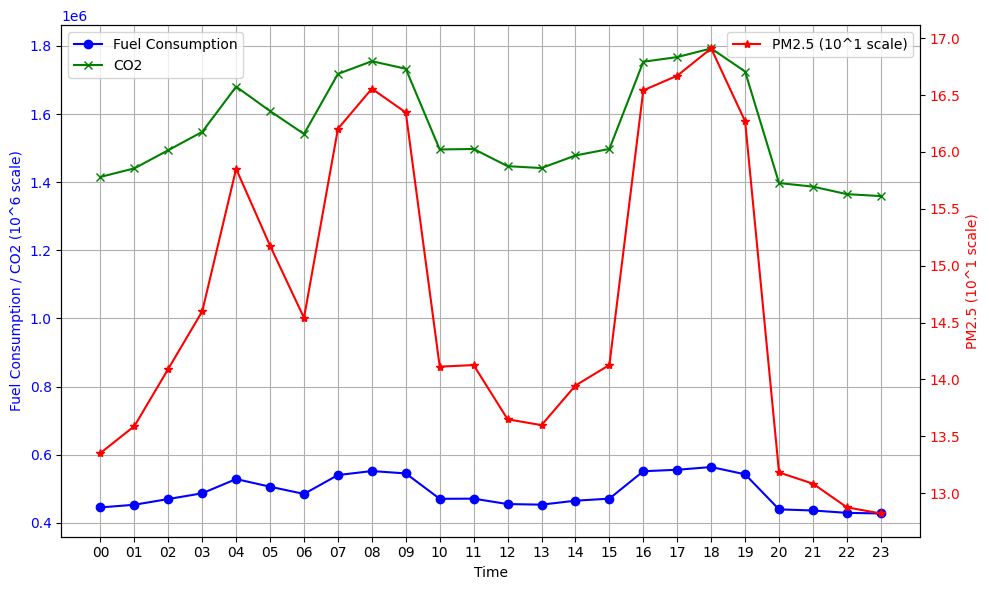

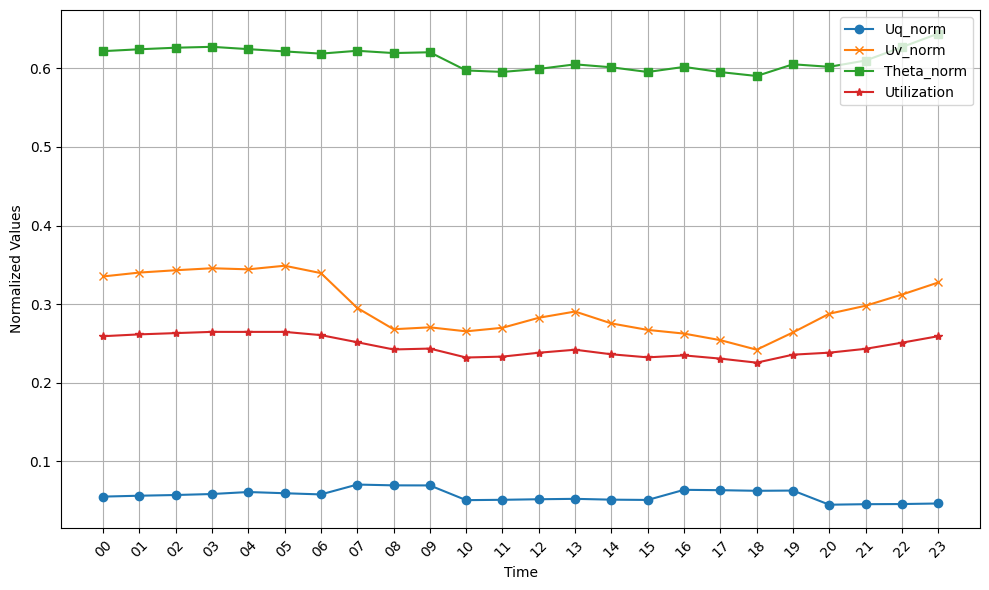

In [10]:
# Function to convert time slot (0-143) to HH format (only hours)
def time_slot_to_hhmm(slot):
    hours = slot // 6  # Each 10-minute slot corresponds to 1/6th of an hour
    return f'{hours:02}'


    
# Step 2: Group by 'time' and calculate the mean of each column
aggregated_time_data = road_data.groupby('time').mean().reset_index()

# Step 3: Filter for only hourly data (slots: 0, 6, 12, ..., 138)
hourly_slots = aggregated_time_data[aggregated_time_data['time'] % 6 == 0]

# Convert time slots to 'HH:MM' format for x-axis labels
hourly_time_labels = hourly_slots['time'].apply(time_slot_to_hhmm)


# Step 5: Plot 1: fuel_consumption, co2, and pm2.5 with dual y-axes
fig, ax1 = plt.subplots(figsize=(10, 6))

# Primary y-axis for fuel_consumption and co2
ax1.plot(hourly_time_labels, hourly_slots['fuel_consumption'], color='b', label='Fuel Consumption', marker='o')
ax1.plot(hourly_time_labels, hourly_slots['co2'], color='g', label='CO2', marker='x')

ax1.set_xlabel('Time')
ax1.set_ylabel('Fuel Consumption / CO2 (10^6 scale)', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.grid(True)

# Secondary y-axis for pm2.5
ax2 = ax1.twinx()
ax2.plot(hourly_time_labels, hourly_slots['pm2.5'], color='r', label='PM2.5 (10^1 scale)', marker='*')
ax2.set_ylabel('PM2.5 (10^1 scale)', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Adding legends
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Rotate x-axis labels for readability
plt.xticks(rotation=45)

# Save and show the first plot
plt.tight_layout()
plt.show()

# Step 6: Plot 2: Uq_norm, Uv_norm, theta_norm, utilization in one figure
plt.figure(figsize=(10, 6))

# Plot all columns in the same figure
plt.plot(hourly_time_labels, hourly_slots['Uq_norm'], label='Uq_norm', marker='o')
plt.plot(hourly_time_labels, hourly_slots['Uv_norm'], label='Uv_norm', marker='x')
plt.plot(hourly_time_labels, hourly_slots['theta_norm'], label='Theta_norm', marker='s')
plt.plot(hourly_time_labels, hourly_slots['utilization'], label='Utilization', marker='*')

# Add labels and grid
plt.xlabel('Time')
plt.ylabel('Normalized Values')
plt.grid(True)

# Rotate x-axis labels for readability
plt.xticks(rotation=45)

# Add legend
plt.legend(loc='upper right')

# Save and show the second plot
plt.tight_layout()
plt.show()

In [22]:
road_data.loc[road_data['level'] <= 1, 'level'] = 1
road_data.loc[road_data['level'] == 2, 'level'] = 2
road_data.loc[road_data['level'] > 2, 'level'] = 3

## Flow utilization

In [12]:
# Define the time periods for morning, afternoon, and evening
morning_hours = range(8*6, 10*6)    # 8 AM to 10 AM
afternoon_hours = range(14*6, 17*6) # 2 PM to 5 PM
evening_hours = range(18*6, 20*6)   # 6 PM to 08 PM

# Create subsets for each time period
morning_data = road_data[road_data['time'].isin(morning_hours)]
afternoon_data = road_data[road_data['time'].isin(afternoon_hours)]
evening_data = road_data[road_data['time'].isin(evening_hours)]

# Aggregate the data to compute mean values for each period
morning_summary = morning_data[['Uq', 'Uv', 'Uq_norm', 'Uv_norm','theta_norm', 'utilization']].mean()
afternoon_summary = afternoon_data[['Uq', 'Uv', 'Uq_norm', 'Uv_norm','theta_norm','utilization']].mean()
evening_summary = evening_data[['Uq', 'Uv', 'Uq_norm', 'Uv_norm','theta_norm', 'utilization']].mean()

# Create a summary DataFrame to compare the results
summary_df = pd.DataFrame({
    'Period': ['Morning', 'Afternoon', 'Evening'],
    'Avg_Uq': [morning_summary['Uq'], afternoon_summary['Uq'], evening_summary['Uq']],
    'Avg_Uv': [morning_summary['Uv'], afternoon_summary['Uv'], evening_summary['Uv']],
    'Avg_Uq_norm': [morning_summary['Uq_norm'], afternoon_summary['Uq_norm'], evening_summary['Uq_norm']],
    'Avg_Uv_norm': [morning_summary['Uv_norm'], afternoon_summary['Uv_norm'], evening_summary['Uv_norm']],
    'Avg_theta_norm': [morning_summary['theta_norm'], afternoon_summary['theta_norm'], evening_summary['theta_norm']],
    'Avg_Utilization': [morning_summary['utilization'], afternoon_summary['utilization'], evening_summary['utilization']]
})


In [13]:
summary_df

,Period,Avg_Uq,Avg_Uv,Avg_Uq_norm,Avg_Uv_norm,Avg_theta_norm,Avg_Utilization
0,Morning,0.565830,0.933312,0.045416,0.242860,0.426000,0.189153
1,Afternoon,0.578728,0.932704,0.042045,0.241726,0.410016,0.184116
2,Evening,0.667236,0.919464,0.049331,0.238600,0.416134,0.185614


In [15]:
# # Set up the figure and axes
# fig, ax = plt.subplots(3, 1, figsize=(8, 12))

# # Plot Avg_Uq
# ax[0].bar(summary_df['Period'], summary_df['Avg_Uq'])
# ax[0].set_title('Average Uq by Time Period')
# ax[0].set_ylabel('Avg Uq')

# # Plot Avg_Uv
# ax[1].bar(summary_df['Period'], summary_df['Avg_Uv'])
# ax[1].set_title('Average Uv by Time Period')
# ax[1].set_ylabel('Avg Uv')

# # Plot Avg_Utilization
# ax[2].bar(summary_df['Period'], summary_df['Avg_Utilization'])
# ax[2].set_title('Average Utilization by Time Period')
# ax[2].set_ylabel('Avg Utilization')

# # Adjust layout
# plt.tight_layout()
# plt.show()

In [16]:
# Step 1: Calculate the average utilization for each road segment
road_utilization = road_data.groupby('road_id')['utilization'].mean().reset_index()

# Step 2: Set thresholds for high and low utilization (e.g., top 10% and bottom 10%)
high_threshold = road_utilization['utilization'].quantile(0.9)  # Top 10%
low_threshold = road_utilization['utilization'].quantile(0.1)   # Bottom 10%

# Step 3: Identify roads with high and low utilization
high_utilization_roads = road_utilization[road_utilization['utilization'] >= high_threshold]
low_utilization_roads = road_utilization[road_utilization['utilization'] <= low_threshold]

# Display the identified road segments
print("High Utilization Roads:\n", high_utilization_roads)
print("Low Utilization Roads:\n", low_utilization_roads)

High Utilization Roads:
        road_id  utilization
9            9     0.292969
10          10     0.292082
15          15     0.297358
19          19     0.294931
21          21     0.295336
...        ...          ...
81549    81558     0.300005
81550    81559     0.287199
81560    81570     0.302873
81561    81571     0.297305
81577    81587     0.312707

[8159 rows x 2 columns]
Low Utilization Roads:
        road_id  utilization
31          31     0.125440
36          36     0.103144
48          48     0.119948
61          61     0.113755
62          62     0.118824
...        ...          ...
81462    81471     0.111477
81535    81544     0.119658
81537    81546     0.119806
81553    81563     0.109344
81573    81583     0.125359

[8159 rows x 2 columns]


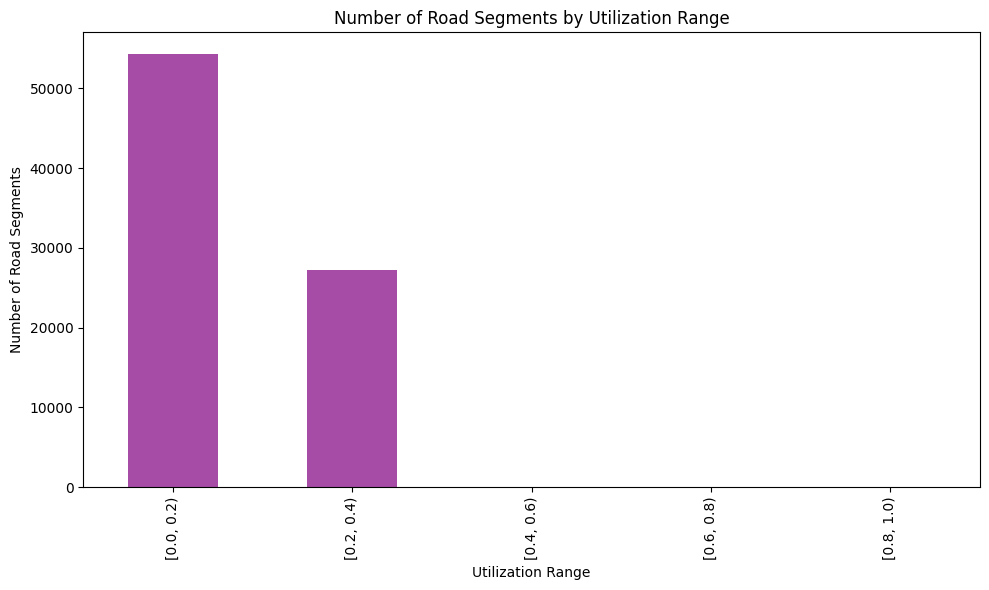

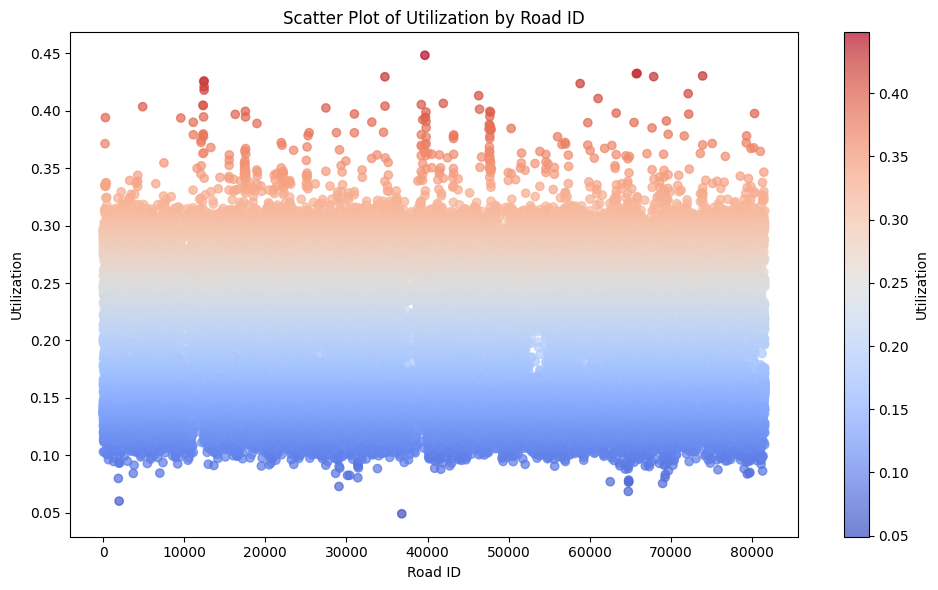

In [17]:
# Preparing data for different visualizations

# Combine high and low utilization data into a single DataFrame
road_utilization['category'] = 'Normal'  # Default category
road_utilization.loc[road_utilization['utilization'] >= high_threshold, 'category'] = 'High Utilization'
road_utilization.loc[road_utilization['utilization'] <= low_threshold, 'category'] = 'Low Utilization'


# 4. Bar Plot by Utilization Range
utilization_bins = pd.cut(road_utilization['utilization'], bins=[0, 0.2, 0.4, 0.6, 0.8, 1.0], right=False)
utilization_counts = utilization_bins.value_counts().sort_index()
plt.figure(figsize=(10, 6))
utilization_counts.plot(kind='bar', color='purple', alpha=0.7)
plt.title('Number of Road Segments by Utilization Range')
plt.xlabel('Utilization Range')
plt.ylabel('Number of Road Segments')
plt.tight_layout()
plt.show()

# 5. Scatter Plot (Utilization vs. Road IDs)
plt.figure(figsize=(10, 6))
plt.scatter(road_utilization['road_id'], road_utilization['utilization'], c=road_utilization['utilization'], cmap='coolwarm', alpha=0.7)
plt.title('Scatter Plot of Utilization by Road ID')
plt.xlabel('Road ID')
plt.ylabel('Utilization')
plt.colorbar(label='Utilization')
plt.tight_layout()
plt.show()

In [ ]:
road_data.loc[road_data['level'] <= 1, 'level'] = 1
road_data.loc[road_data['level'] == 2, 'level'] = 2
road_data.loc[road_data['level'] > 2, 'level'] = 3

# Define utilization bins
bins = [0.0, 0.2, 0.4, 0.6, 0.8, 1.0]
labels = ['[0.0,0.2]', '[0.2,0.4]', '[0.4,0.6]', '[0.6,0.8]', '[0.8,1.0]']

# Add a new column 'util_range' with utilization ranges
road_data['util_range'] = pd.cut(road_data['utilization'], bins=bins, labels=labels, include_lowest=True)

# Pivot the table to get counts for each range and level
pivot_table = road_data.pivot_table(index='util_range', columns='level', aggfunc='size', fill_value=0)

# Plotting
pivot_table.plot(kind='bar', stacked=False, width=0.7, color=['blue', 'red', 'orange'])

# Set labels and title
plt.xlabel('Utilization Range')
plt.ylabel('Number of Road Segments')
# plt.title('Road Segment Utilization by Level')
plt.legend(title='Level')
plt.xticks(rotation=0)
plt.show()